# Python для финансовых расчетов

In [2]:
import numpy as np

In [ ]:
#r - ставка доходности
#mu - ожидаемая ставка доходности (средняя)

In [20]:
S0 = 10 #текущая цена
S1 = np.array((20, 5))  #будущая цена: верхняя и нижняя граница

In [21]:
#вероятность события по оптимистичному и пессимистичному сценарию
p = 0.4
1 - p

0.6

In [22]:
P = np.array((p, 1-p))
P

array([0.4, 0.6])

In [23]:
#функция ставки доходности, где x1 и x0 денежные потоки
def r(x0, x1):
    return (x1 - x0) / x0 
#ожидаемая ставка доходности (мат ожидание)
mu = np.dot(P, r(S0, S1)) 

def sigma2(P, r, mu):
    return np.dot(P, (r - mu) ** 2) 
#Волатильность
def sigma(P, r, mu):
    return np.sqrt(np.dot(P, (r - mu) ** 2)) 


In [24]:
r(S0, S1)

array([ 1. , -0.5])

In [25]:
mu

0.10000000000000003

In [26]:
sigma(P, r(S0, S1), mu)

0.7348469228349535

Text(0, 0.5, '$C_1$')

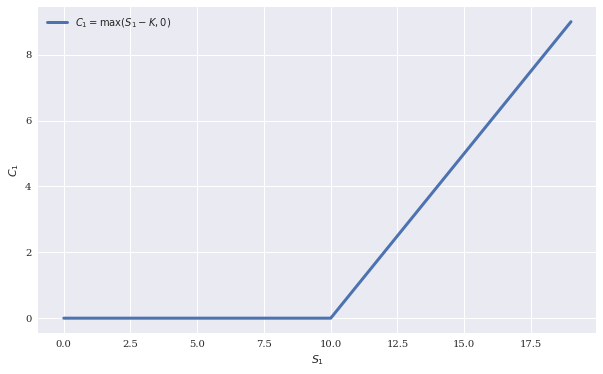

In [17]:
#берем набор вариантов возможных цен на базовый инструмент в будущем
S1 = np.arange(20) 
#Установление цены исполнения колл-опциона K (это наши расходы)
K = 10 
#выбираем что больще доходы в будущем минус расходы на опцион или 0
C1 = np.maximum(S1 - K, 0) 

from pylab import mpl, plt 
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
plt.figure(figsize=(10, 6))
plt.plot(S1, C1, lw = 3.0, label='$C_1 = \max(S_1 - K, 0)$') 
plt.legend(loc=0) 
plt.xlabel('$S_1$') 
plt.ylabel('$C_1$')

In [ ]:
#График показывает, что при цене S1 менее 10, доходы будут 0. А при цене более 10 доходы увеличиваются от 0 до ...

In [5]:
B = (10, np.array((11, 11))) #облигация без риска поэтому один сценарий с будущим доходом 11
S = (10, np.array((20, 5))) #акция рисковая, поэтому два сценария оптимистичный (20) и пессимистичный (5)
M = np.array((B[1], S[1])).T #Определение матрицы (двумерного объекта ndarray) с векторами будущих выплат
K = 15 #Установление цены исполнения колл-опциона K (это наши расходы)
C1 = np.maximum(S[1] - K, 0) #Вычисление значения вектора выплат через год
phi = np.linalg.solve(M, C1) #Решение задачи репликации в матричной форме для получения оптимальной позиции портфеля
phi

array([-0.15151515,  0.33333333])

In [ ]:
#-0.15151515 Доля облигаций равна 15,15%, но со знаком минус, 
#так как открыта короткая позиция по облигациям и мы деньги получили от продажи

In [ ]:
#0.33333333 Доля купленных акций

In [ ]:
#100% это полная доля используемых денег

In [30]:
#Мы использовали долю денег
a = 0.33333333 - 0.15151515
print(a)

0.18181818


In [32]:
#доля денег, которые могут быть вложены в безрисковый инструмент 
#для получения дополнительной доходности
b = 1 - a
print(b)

0.81818182
